In [1]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 3. Edge Detection

In [2]:
from skimage.measure import compare_ssim
from evaluate import evaluate
# The code returns the accuracy of the edge detector when compared against the ground truth
# OUTPUT_FILE_PATH: Path of the image containing the edges obtained using edge detector
# GROUND_TRUTH_PATH: Path of the corresponding ground truth image (present in the folder data/ground_truth)
# An example of how to use the evaluate function is shown as follows:
OUTPUT_FILE_PATH = 'data/test.png'
GROUND_TRUTH_PATH = 'data/ground_truth/3096.bmp'
print ('Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)))

Accuracy: 0.621913


## 3-1 Edge detection prediction function

In [3]:
# Predict, make, and save the files as "Edge detection", seperated folders and file names, in order to run nevaluate.py for the future.
# This function will be operated to Sobel and Canny methods. This is because HED and StrcuturedForesets are run in the terminal environment.
def Edge_Detector(func, INPUT_FILE_PATH, OUTPUT_FILE_PATH):
    for input_image_path in os.listdir(INPUT_FILE_PATH):
        input_image_id = input_image_path.split('.')[0]
        output_image = func(os.path.join(INPUT_FILE_PATH,input_image_path))
        output_image_path = os.path.join(OUTPUT_FILE_PATH,input_image_id+'_'+func.__name__+'.jpg')
        cv2.imwrite(output_image_path, output_image)

## 3-2 Edge detection evaluation function

In [4]:
# Run the evaluate.py file, which is for the evaluation of edge detection predtion made before.
# Based on these information, we will see the average value of each image accuracy in the each method.
def Edge_Evaluation(func, OUTPUT_FILE_PATH, GROUND_TRUTH_PATH):
    accuracy_container = []
    for ground_truth_image in os.listdir(GROUND_TRUTH_PATH):
        ground_truth_id = ground_truth_image.split('.')[0]
        ground_truth_path = os.path.join(GROUND_TRUTH_PATH,ground_truth_image)
        output_image_path = os.path.join(OUTPUT_FILE_PATH,ground_truth_id+'_'+func.__name__+'.jpg')
        accuracy_container.append(evaluate(output_image_path, ground_truth_path))
    return accuracy_container

## 3.1 Edge Detector 1 (Sobel)

> Reference code
 - http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html#gradients
 - https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html

In [5]:
### Sobel
### Fill your code here
### Using the build-in funciton of OpenCV
def Sobel(IMAGE_PATH):
    img = cv2.imread(IMAGE_PATH,0)
    # Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
    Sobel64f_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    Sobel64f_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    Sobel_8u = np.uint8(np.sqrt((Sobel64f_x).astype(int)**2+(Sobel64f_y).astype(int)**2))
    return Sobel_8u

### Report the accuracy obtained
Edge_Detector(Sobel, 'data/img', 'data/edge/Sobel')
acc_Sobel = Edge_Evaluation(Sobel, 'data/edge/Sobel', 'data/ground_truth')  
print('Sobel: Average accuracy of test images: %f'%np.mean(acc_Sobel))

### Report any improvements you have tried: I tried with Sobel operator to have only positive slopes (values).
def Sobel_improve(IMAGE_PATH):
    img = cv2.imread(IMAGE_PATH,0)
    Sobel8u_x = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
    Sobel8u_y = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
    Sobel_8u = np.uint8(np.sqrt((Sobel8u_x).astype(int)**2+(Sobel8u_y).astype(int)**2))
    return Sobel_8u

Edge_Detector(Sobel_improve, 'data/img', 'data/edge/Sobel')
acc_Sobel_improve = Edge_Evaluation(Sobel_improve, 'data/edge/Sobel', 'data/ground_truth')  
print('Sobel_improve: Average accuracy of test images: %f'%np.mean(acc_Sobel_improve))

Sobel: Average accuracy of test images: 0.358158
Sobel_improve: Average accuracy of test images: 0.468546


- The Sobel_improve led to the slightliy enhanced accuracy rather than Sobel method.

### Processed images of Sobel_improve

- Processed images of Sobel are not attached here, because their accuracies are lower than Sobel_improve.

- Image: 3096
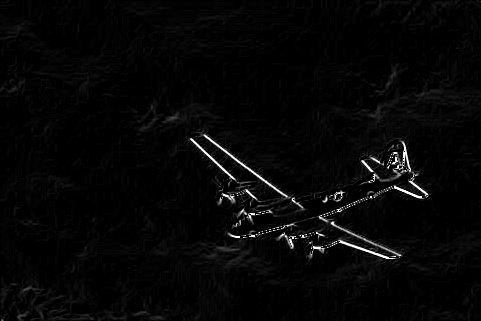
- Image: 8023
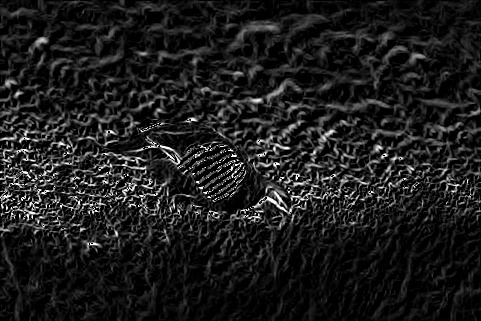
- Image: 12084
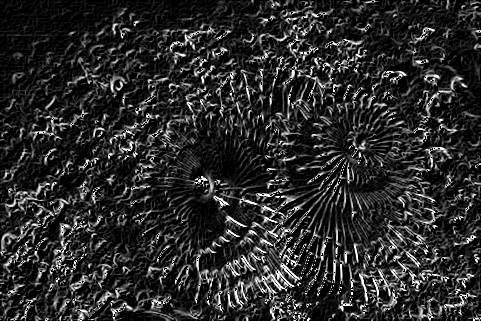
- Image: 14037
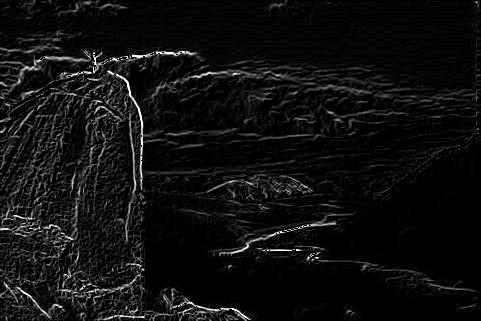
- Image: 16077
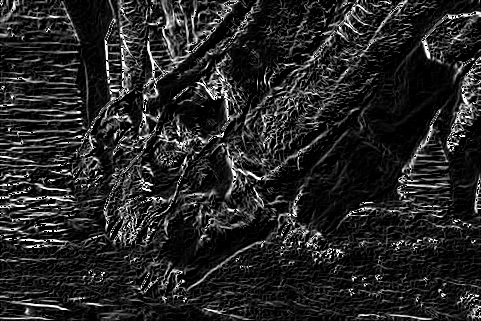
- Image: 19021
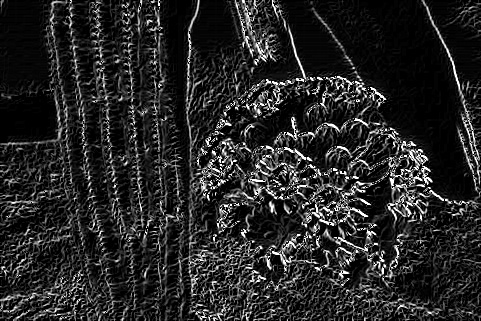
- Image: 21077
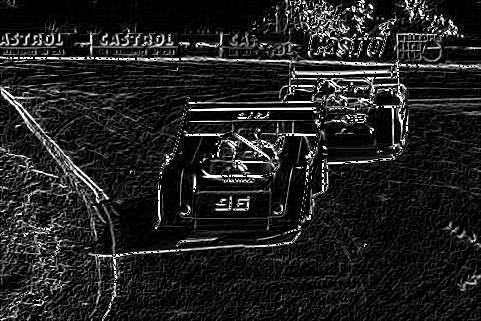
- Image: 24077
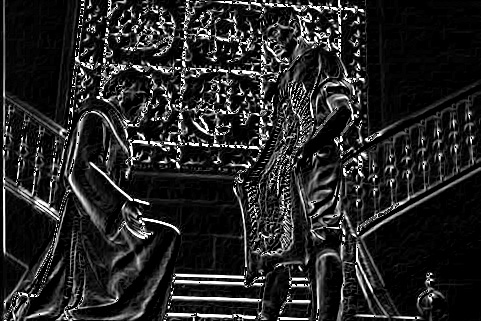
- Image: 33039
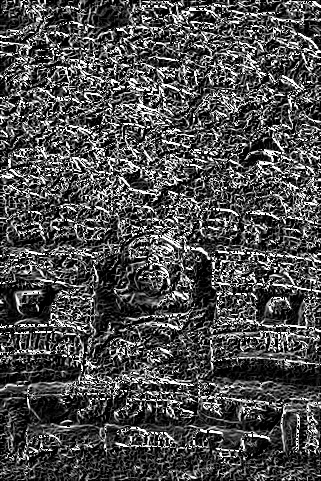
- Image: 37073
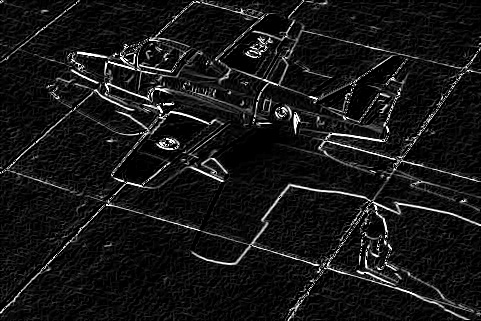

## 3.2 Edge Detector 2 (Canny)

> Reference for 'normal' Canny
 - http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
 
> Reference for 'improved' Canny
 - https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html

In [6]:
### Canny
### Fill your code here
### Using the build-in funciton of OpenCV

def Canny(IMAGE_PATH,MIN_THRES=200,MAX_THRES=255):
    img = cv2.imread(IMAGE_PATH,0)
    Canny_edge = cv2.Canny(img,MIN_THRES,MAX_THRES,3,3,True)
    return Canny_edge

### Report the accuracy obtained
Edge_Detector(Canny, 'data/img', 'data/edge/Canny')
acc_Canny = Edge_Evaluation(Canny, 'data/edge/Canny', 'data/ground_truth')  
print('Canny: Average accuracy of test images: %f'%np.mean(acc_Canny))

### Report any improvements you have tried: I choose the threshold adaptively 
def Canny_improve(IMAGE_PATH,sigma = 0.05):
    img = cv2.imread(IMAGE_PATH,0)
    v = np.median(img)
    MIN_THRES = int(max(0, (1.0 - sigma) * v))
    MAX_THRES = int(min(255, (1.0 + sigma) * v))
    Canny_edge = cv2.Canny(img,MIN_THRES,MAX_THRES,3,3,True)
    return Canny_edge

Edge_Detector(Canny_improve, 'data/img', 'data/edge/Canny')
acc_Canny_improve = Edge_Evaluation(Canny_improve, 'data/edge/Canny', 'data/ground_truth')  
print('Canny_improve: Average accuracy of test images: %f'%np.mean(acc_Canny_improve))

Canny: Average accuracy of test images: 0.605585
Canny_improve: Average accuracy of test images: 0.368369


- Unfortunately, the attempt to the improvement is turned out to the worse result.

### Processed images of Canny

 - Processed images of Canny_improve are not attached here, because the accuracies are too lower than Canny.

- Image: 3096
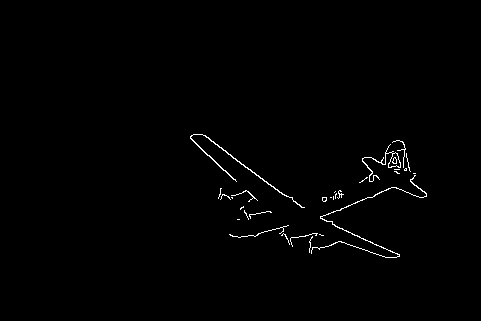
- Image: 8023
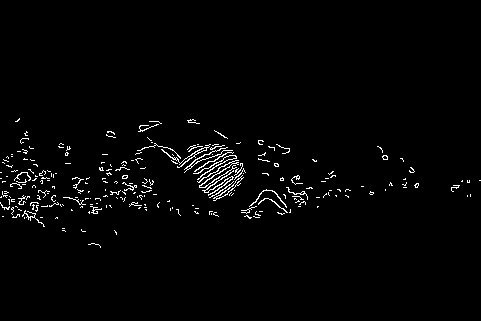
- Image: 12084
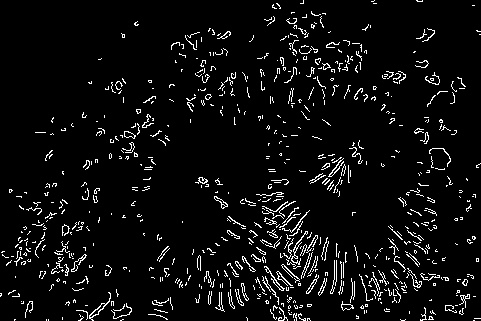
- Image: 14037
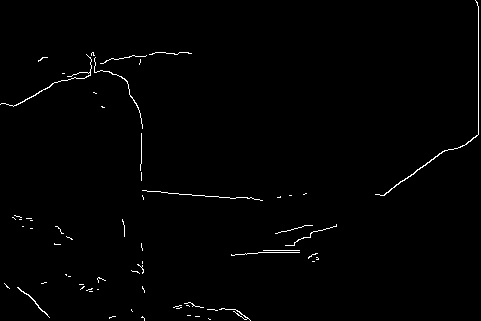
- Image: 16077
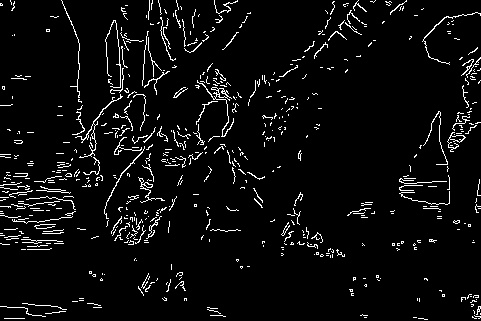
- Image: 19021
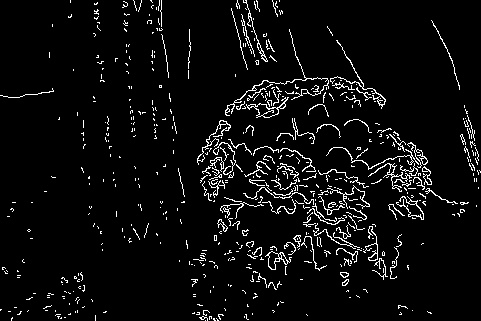
- Image: 21077
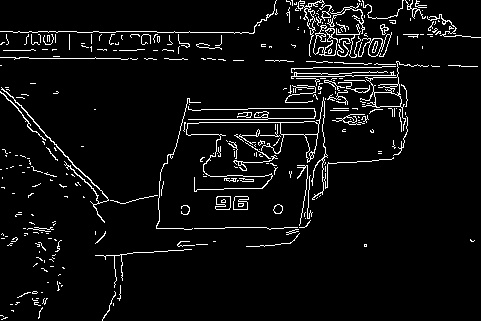
- Image: 24077
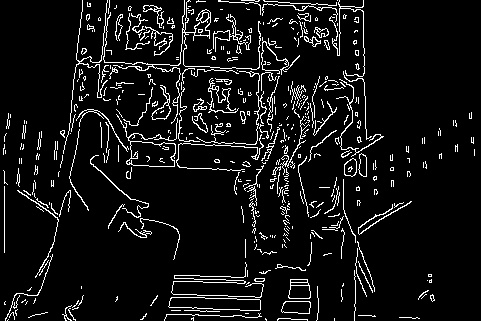
- Image: 33039
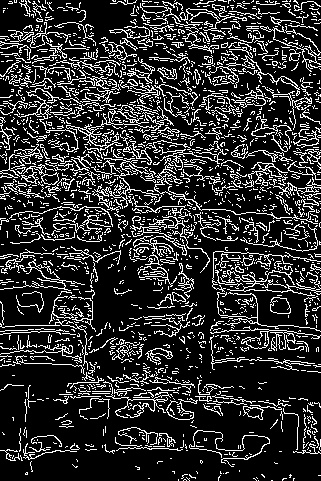
- Image: 37073
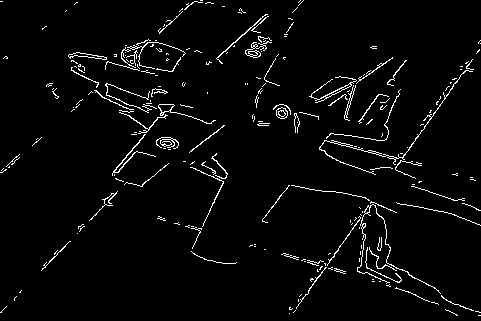

## 3.3 Edge Detector 3 (Holistically-Nested Edge Detection (HED)

> Reference
 - https://github.com/legolas123/cv-tricks.com/tree/master/OpenCV/Edge_detection
 - https://cv-tricks.com/opencv-dnn/edge-detection-hed/

In [ ]:
# Use the reference module from the github. Once we use the source, activate the following code.
# import os 
# import sys
# os.chdir('/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/ref/HED')
# os.getcwd()
# sys.path.append(os.getcwd())

In [ ]:
# run sh download_pretrained.sh at the terminal
# run python edge.py --input imagename.jpg at the terminal and save the converted images.
# Above commands are instruction of github. The jupyter kernel was crashed once it was imported, so I used the terminal to run it.

In [7]:
# Edge detection evaluation accuracy of HED
def Edge_Evaluation_HED(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH):
    accuracy_container = []
    for ground_truth_image in os.listdir(GROUND_TRUTH_PATH):
        ground_truth_id = ground_truth_image.split('.')[0]
        ground_truth_path = os.path.join(GROUND_TRUTH_PATH,ground_truth_image)
        output_image_path = os.path.join(OUTPUT_FILE_PATH,ground_truth_id+'_HED.jpg')
        accuracy_container.append(evaluate(output_image_path, ground_truth_path))
    return accuracy_container

In [8]:
### Report the accuracy obtained
#Edge_Detector_Predict('data/img', 'data/edge/HED')
acc_HED = Edge_Evaluation_HED('data/edge/HED', 'data/ground_truth')  
print('HED: Average accuracy of test images: %f'%np.mean(acc_HED))
#os.chdir('/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/')

HED: Average accuracy of test images: 0.664096


### Processed images of HED

- Image: 3096
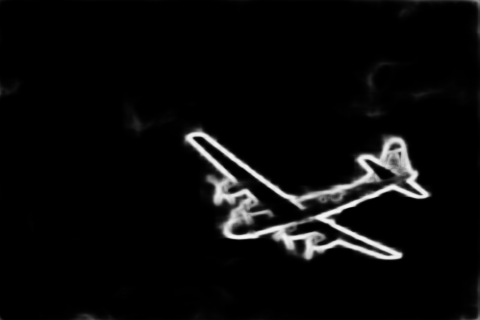
- Image: 8023
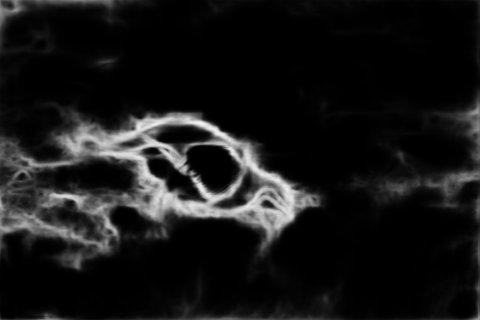
- Image: 12084
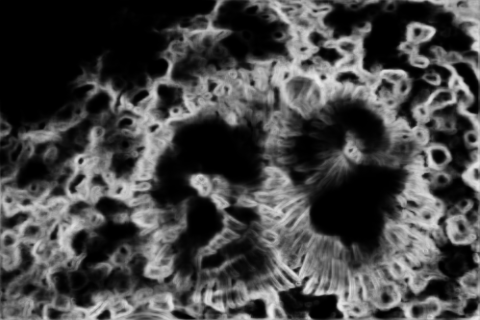
- Image: 14037
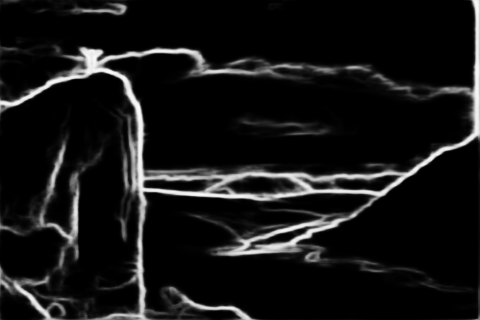
- Image: 16077
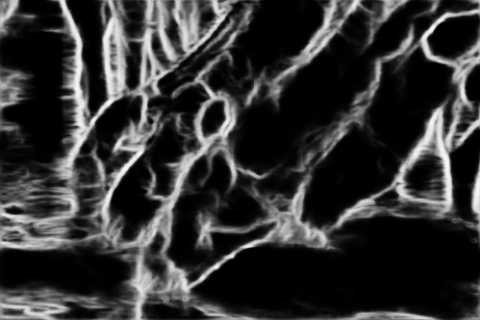
- Image: 19021
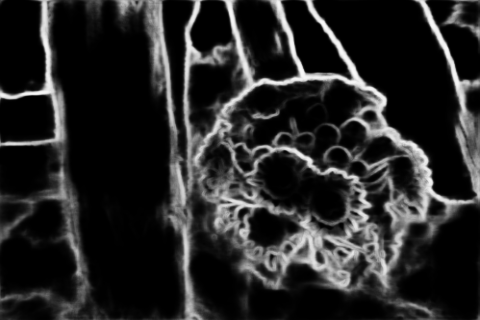
- Image: 21077
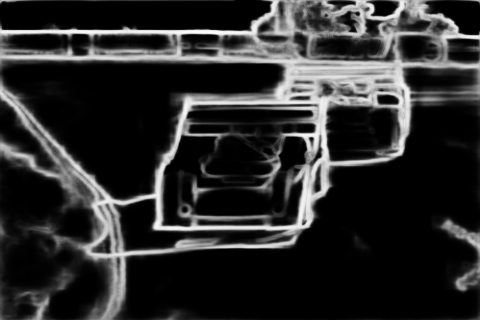
- Image: 24077
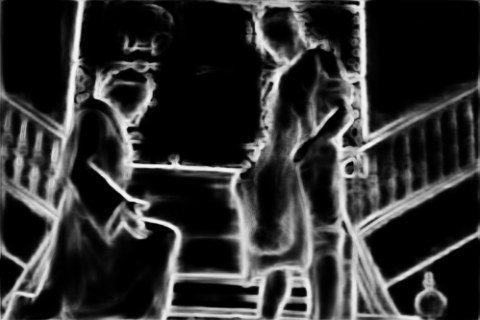
- Image: 33039
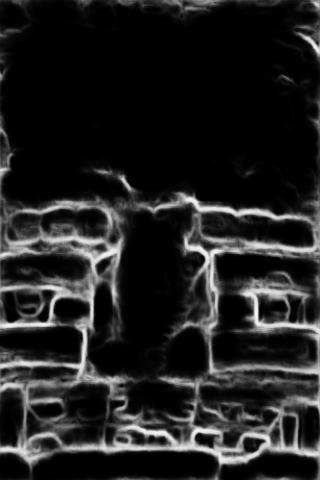
- Image: 37073
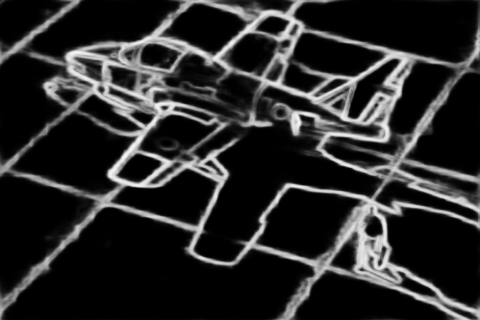

## 3.3 Edge Detector 4 (Structured Forests)

> Reference code
 - https://github.com/ArtanisCV/StructuredForests
 - https://answers.opencv.org/question/209660/python-opencv-structured-forests-edge-detection-typeerror/

In [ ]:
# import os
# import sys
# os.chdir('/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/ref/StructuredForests')
# os.getcwd()

In [9]:
# Edge detection evaluation accuracy of StructuredForest
def Edge_Evaluation_SF(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH):
    accuracy_container = []
    for ground_truth_image in os.listdir(GROUND_TRUTH_PATH):
        ground_truth_id = ground_truth_image.split('.')[0]
        ground_truth_path = os.path.join(GROUND_TRUTH_PATH,ground_truth_image)
        output_image_path = os.path.join(OUTPUT_FILE_PATH,ground_truth_id+'_StructuredForests.jpg')
        accuracy_container.append(evaluate(output_image_path, ground_truth_path))
    return accuracy_container

In [10]:
# ### Fill your code here
# # import sys
# # import os
# # os.chdir('../ref/StructuredForests')
# sys.path.append(os.getcwd())
# from StructuredForests import *

# def StructuredForests(IMAGE_PATH):
#     edge = predict(IMAGE_PATH) 
#     return edge

# ### Report the accuracy obtained
# Edge_Detector_Predict(StructuredForests, '/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/data/img', '/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/data/edge/StructuredForests')
acc_SF = Edge_Evaluation_SF('/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/data/edge/StructuredForests', '/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/data/ground_truth')  
print('Structured Forests: Average accuracy of test images: %f'%np.mean(acc_SF))
#os.chdir('/Users/Haenara.SHIN/Documents/0 UCSD/1 Classes/2019-2020/3 2020 Spring (Reader)/COGS 260 (Image Recognition)/HW/Homework1/')

Structured Forests: Average accuracy of test images: 0.758131


### Processed images of Structured Forests

- Image: 3096
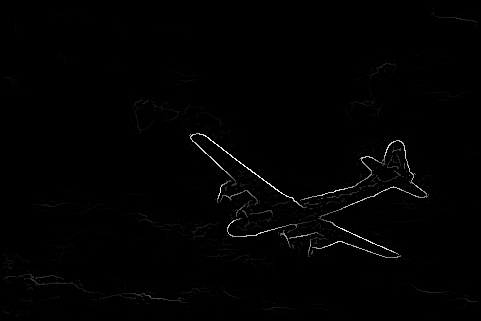
- Image: 8023
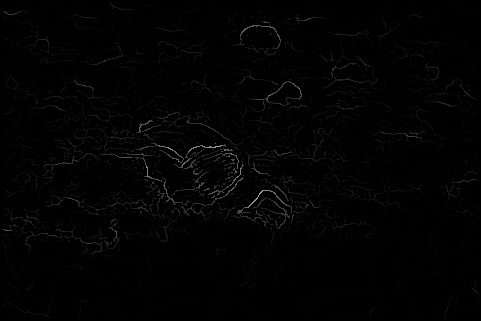
- Image: 12084
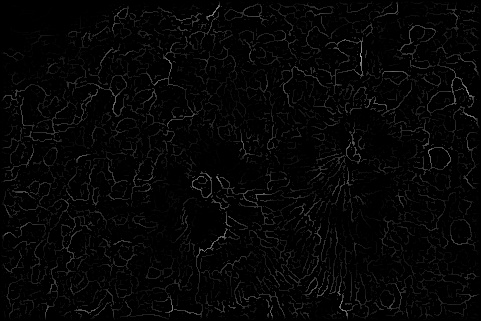
- Image: 14037
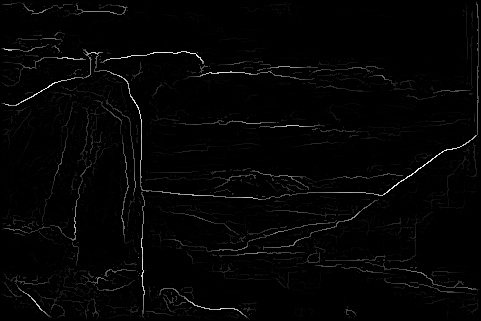
- Image: 16077
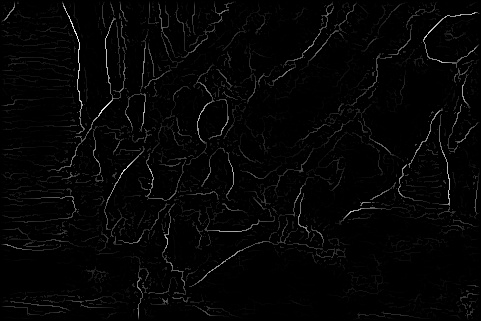
- Image: 19021
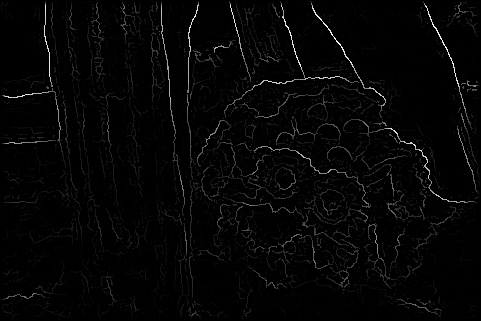
- Image: 21077
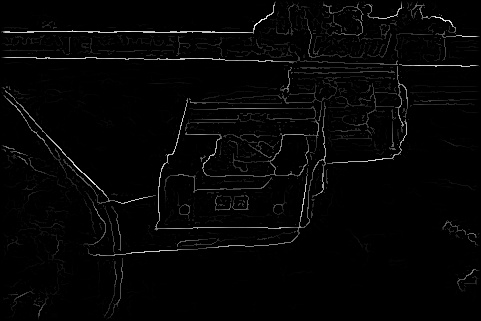
- Image: 24077
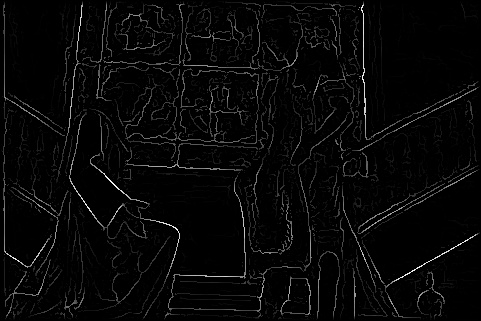
- Image: 33039
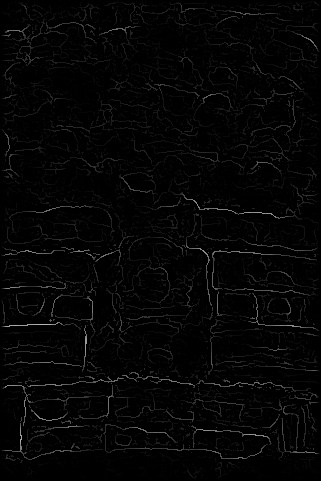
- Image: 37073
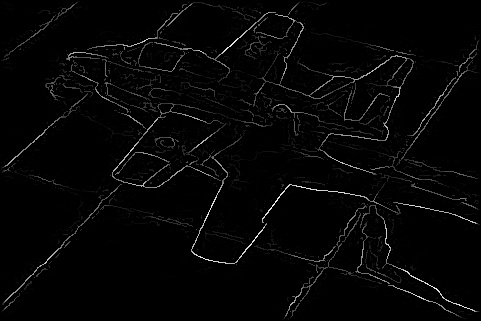

# Result (Summary of accuracies for operators)

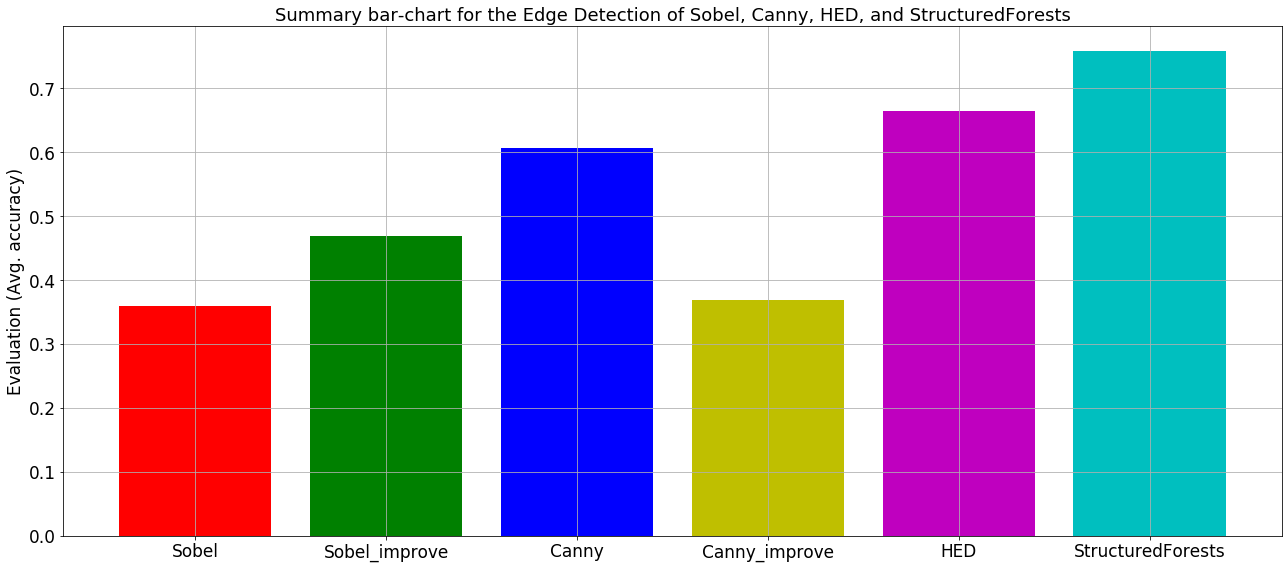

In [29]:
name_list = ['Sobel','Sobel_improve', 'Canny', 'Canny_improve' ,'HED', 'StructuredForests'] 
acc_list = [np.mean(acc_Sobel), np.mean(acc_Sobel_improve),np.mean(acc_Canny), np.mean(acc_Canny_improve),np.mean(acc_HED), np.mean(acc_SF)]  

plt.figure(figsize=(18,8))
plt.bar(range(len(name_list)), acc_list, color='rgbymc',tick_label=name_list)
plt.title('Summary bar-chart for the Edge Detection of Sobel, Canny, HED, and StructuredForests', fontsize=18)
#plt.xlabel('Edge Detection Methods', fontsize=16)
plt.ylabel('Evaluation (Avg. accuracy)', fontsize=17)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.grid(True)
plt.tight_layout()
plt.show()

### Discuss any differences between different edge detectors based on what you have learned in class.

> Reference
 - https://cv-tricks.com/opencv-dnn/edge-detection-hed/
 - http://andyzeng.github.io/ip/proj1/DollarICCV13edges.pdf
 - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html#gradients
 - https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
 - https://docs.opencv.org/2.4/doc/tutorials/imgproc/imgtrans/canny_detector/canny_detector.html

- One of the most popular technique for edge detection has been Canny Edge detection which has been the go-to method for most of the computer vision research. From the quantitative evaluation (average accuracy), it appears that Canny operator gives better edge detection accuracy than Sobel operators including its improved operator (here, Sobel_improve). 

- Canny operator is based on that the intensity change only happens on the boundaries. So, we can very easily identify edges just by observing the change in intensity. This method has followed four steps: 
(1) Noise removal(using a Gaussian filter of 5×5), (2) Gradient Calculation(intensity, direction on each pixel), (3) Non-Maximal Suppression(picking the pixels with the highest gradient values and those are edges, and picking the local maxima in a neighborhood of 3×3 in the direction of gradients), (4) Hysteresis Thresholding(decision on a threshold value of the gradient below which all the pixels would be suppressed(set to zero), and pixels having gradients between these two thresholds are checked if they are connected to an edge, then they are kept else suppressed.
 - High threshold= A very high value is chosen in such a way that any pixel having gradient value higher than this value is definitely an edge.
 - Low threshold= A low value is chosen in such a way that any pixel having gradient value below this value is definitely not an edge.
- The thresholds of Canny were tuned to enhance its accuracy, which means the find tuning there parameters are known as the method to boost Canny edge detection accuracy, but the result for our assignment images was not. Also, since the Canny edge detector only focuses on local changes and it has no semantic(understanding the content of the image) understanding, it has limited accuracy(which is great a lot of times).

- The interesting thing is that Hollistically-Nested Edge Detection (here, HED) and Structured Forests operators are shown the better results rather than Sobel and Canny operators. HED is a learning-based end-to-end edge detection system that uses a trimmed VGG-like convolutional neural network for an image to image prediction task. HED makes use of the side outputs of intermediate layers. The output of earlier layers is called side output and the output of all 5 convolutional layers is fused to generate the final predictions. Since the feature maps generated at each layer is of different size, it’s effectively looking at the image at different scales. HED method was not only more accurate than Sobel and Canny methods but also much faster than them too. 

- Similar to HED, Structured Forests methods is based on the machine learning, which is using the decision tree model. Because patches of edges exhibit well-known forms of local structure, such as straight lines or T-junctions, Structured Forests takes advantage of the structure present in local image patches to learn both an accurate and computationally efficient edge detector. The preredicting local edge masks in a structured learning framework applied to random decision forests. Especially, the structured forests operator uses learning decision trees to robustly map the structured labels to a discrete space on the standard information gain. 